<a href="https://colab.research.google.com/github/Lounes-Kheris/IA-projects/blob/main/Python-For-ML-Esentially-Docs/pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
 # analyse de donénes du bitcoin
 from google.colab import files
 uploaded = files.upload()

Saving BTC-EUR.csv to BTC-EUR.csv


In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True) # pour que dans le graphique, on observe les date mais pas les indexes 0 1 2 3

In [5]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10
2019-09-19,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10
2019-09-20,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10
2019-09-21,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10
2019-09-22,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10


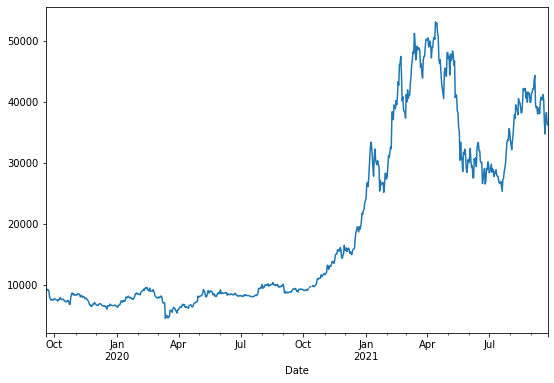

In [6]:
bitcoin['Close'].plot(figsize=(9, 6))

In [ ]:
bitcoin.index
# pour avoir DatetimeIndex
    ## ajout dans read_csv index_col='Date', parse_dates=True

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-25'],
              dtype='datetime64[ns]', name='Date', length=739, freq=None)

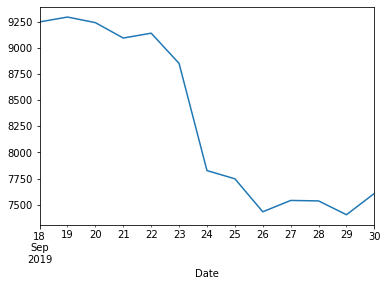

In [7]:
bitcoin['2019-09']['Close'].plot()
#pandas comprend les date

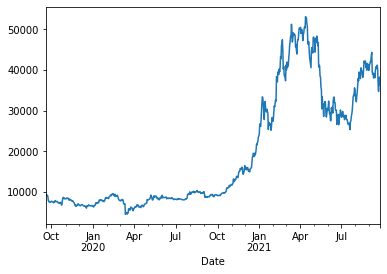

In [8]:
bitcoin.loc['2019':'2021', 'Close'].plot()

Date
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

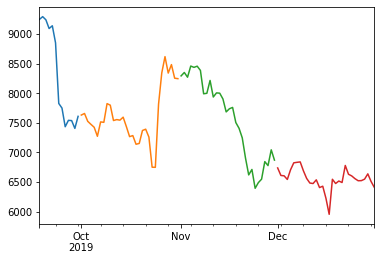

In [9]:
# function resample
bitcoin.loc['2019', 'Close'].resample('M').plot()

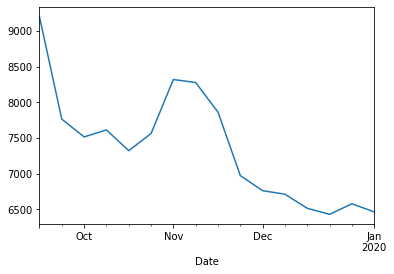

In [10]:
bitcoin.loc['2019', 'Close'].resample('W').mean().plot()

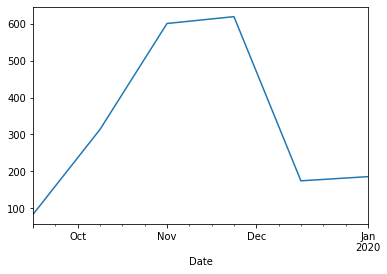

In [11]:
bitcoin.loc['2019', 'Close'].resample('3W').std().plot()

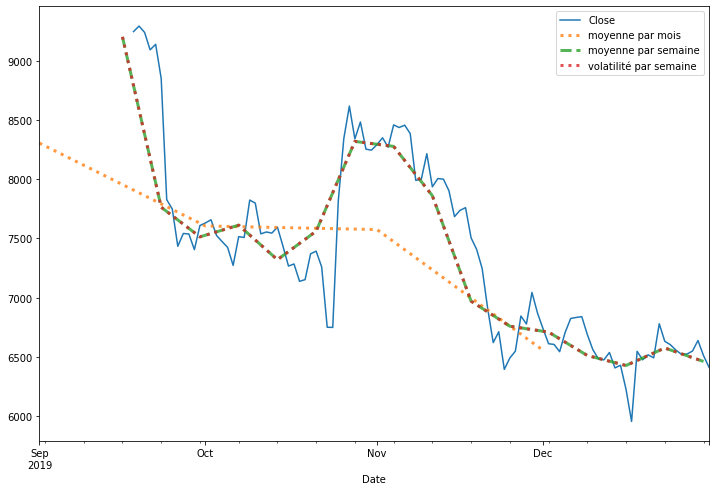

In [12]:
#afficher plusieurs courbes sur un meme graphique
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='volatilité par semaine', lw=3, ls='dotted', alpha=0.8)
plt.legend()

In [13]:
#function aggregate : ressembler dans un seul tableau plusieurs données
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])


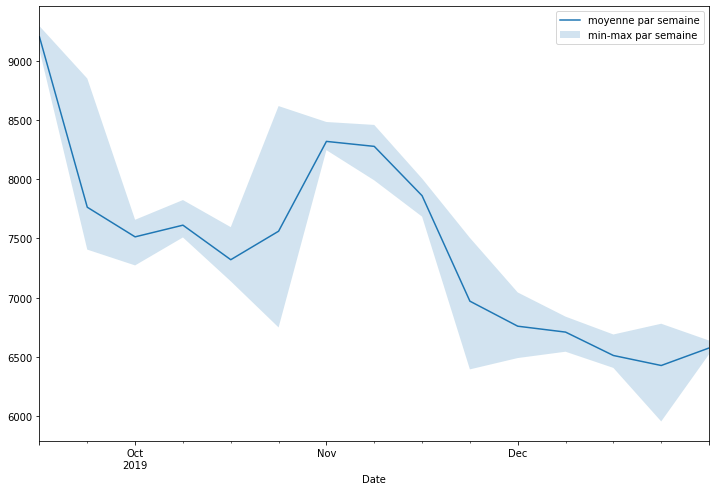

In [14]:
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()


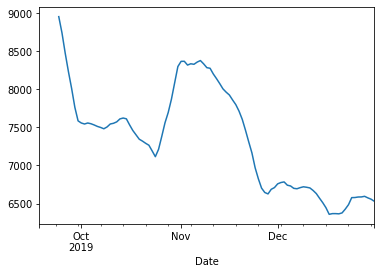

In [15]:
#Moving average : 

bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

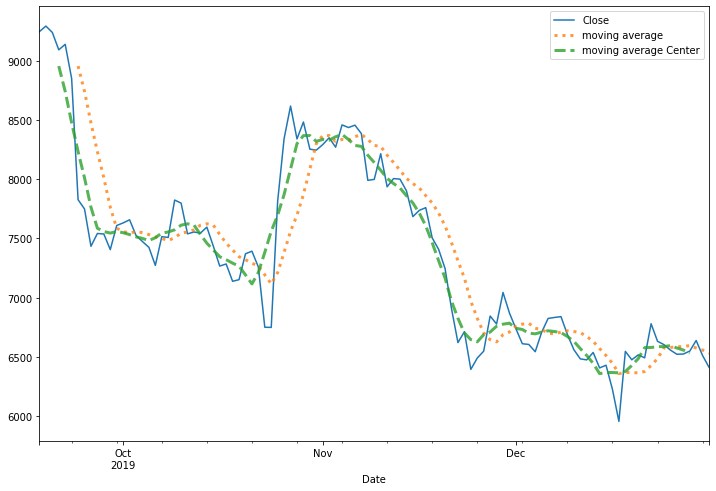

In [16]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].rolling(window=7,center=True).mean().plot(label='moving average Center', lw=3, ls='--', alpha=0.8)

plt.legend()

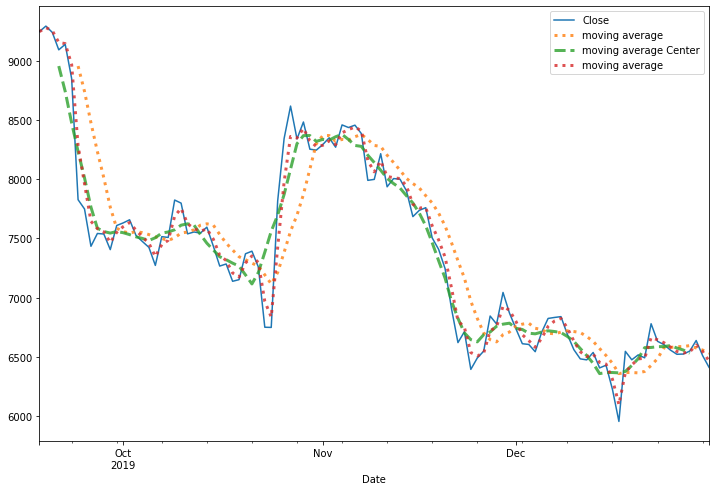

In [17]:
#Exponential weigthed function
  # |Xt = SOMME(alph(1-alph)^n * Xt-n)

plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].rolling(window=7,center=True).mean().plot(label='moving average Center', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019', 'Close'].ewm(alpha=0.6).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
plt.legend()


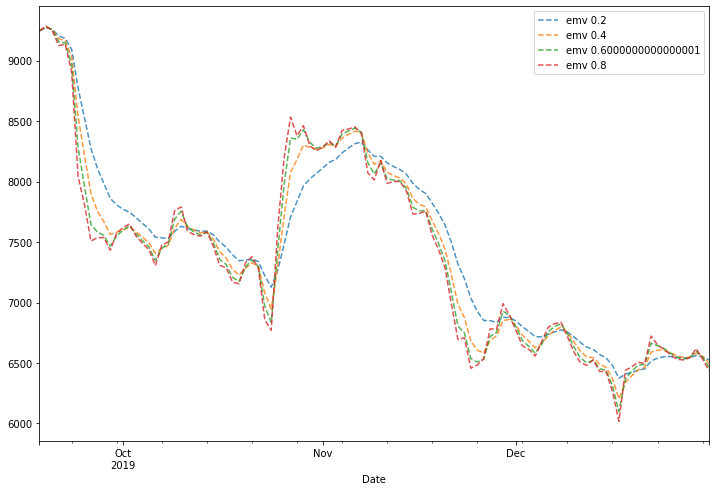

In [18]:
#alpha dans une boucle for

plt.figure(figsize=(12, 8))

for i in np.arange(0.2, 1, 0.2):
  bitcoin.loc['2019', 'Close'].ewm(alpha=i).mean().plot(label=f'emv {i}', ls='--', alpha=0.8)

plt.legend()


In [19]:
uploaded = files.upload()

Saving ETH-EUR.csv to ETH-EUR.csv


In [23]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [25]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08572d06d0>,
      dtype=object)

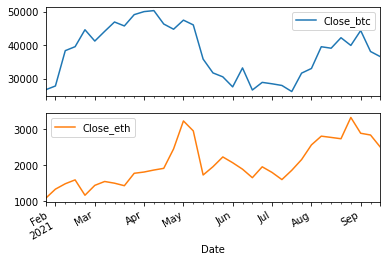

In [26]:
  btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True)

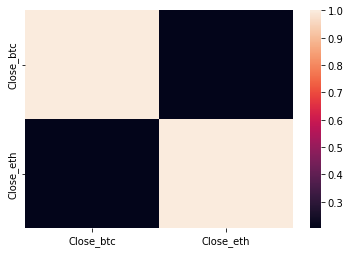

In [30]:
correl = btc_eth[['Close_btc', 'Close_eth']].corr()

import seaborn as sns
sns.heatmap(correl)

In [32]:
# Prectice : trading strategy : acheter ou vendre des actions.

from google.colab import files 
uploaded = files.upload()

Saving BTC-EUR.csv to BTC-EUR (1).csv


In [34]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [36]:
data = bitcoin.copy()
data['buy'] = np.zeros(len(data))
data['sell'] = np.zeros(len(data))

In [66]:
data['rollingmax'] = data['Close'].shift(1).rolling(window=28).max()
data['rollingmin'] = data['Close'].shift(1).rolling(window=28).min()

data.loc[data['rollingmax'] < data['Close'], 'buy'] = 1
data.loc[data['rollingmin'] > data['Close'], 'sell'] = -1

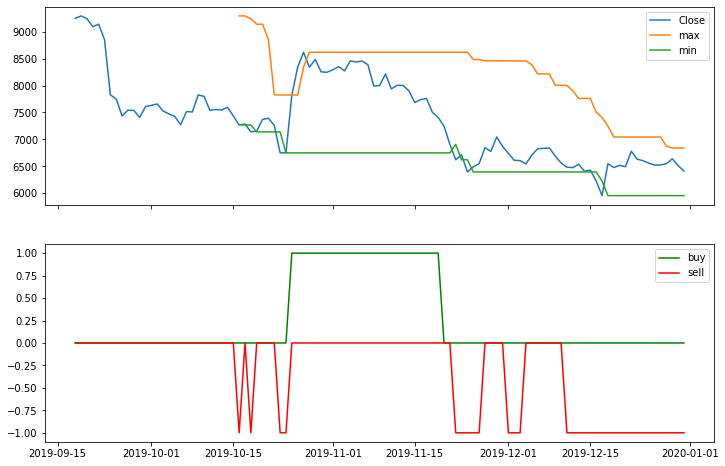

In [68]:
start = '2019'
end = '2019'

fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)

ax[0].plot(data['Close'][start:end]) # le cours du bitcoin
ax[0].plot(data['rollingmax'][start:end]) # le maximum
ax[0].plot(data['rollingmin'][start:end]) #le minimum
ax[0].legend(['Close', 'max', 'min'])
#si ca depasse le max, on achéte, si c'est dessous du min on vend
ax[1].plot(data['buy'][start:end], c='g')
ax[1].plot(data['sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])